**Importing the required packages**

In [7]:
import numpy as np
import pandas as pd
import datetime
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns

**Importing the database**

In [8]:
df=pd.read_csv("../input/earthquake-database/database.csv")
df.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


**Pre-processing the database**

In [9]:
df.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [10]:
df.shape

(23412, 21)

In [11]:
df = df[['Date', 'Time', 'Latitude', 'Longitude', 'Depth', 'Magnitude']]
df.head()

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.246,145.616,131.6,6.0
1,01/04/1965,11:29:49,1.863,127.352,80.0,5.8
2,01/05/1965,18:05:58,-20.579,-173.972,20.0,6.2
3,01/08/1965,18:49:43,-59.076,-23.557,15.0,5.8
4,01/09/1965,13:32:50,11.938,126.427,15.0,5.8


In [12]:
df.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       23412 non-null  object 
 1   Time       23412 non-null  object 
 2   Latitude   23412 non-null  float64
 3   Longitude  23412 non-null  float64
 4   Depth      23412 non-null  float64
 5   Magnitude  23412 non-null  float64
dtypes: float64(4), object(2)
memory usage: 1.1+ MB


**Visualization**

In [14]:
df['Latitude'].unique()

array([ 19.246 ,   1.863 , -20.579 , ...,  36.9179,  -9.0283,  37.3973])

In [15]:
df['Longitude'].unique()

array([ 145.616 ,  127.352 , -173.972 , ...,  140.4262,  118.6639,
        141.4103])

In [16]:
df['Magnitude'].unique()

array([6.  , 5.8 , 6.2 , 6.7 , 5.9 , 8.2 , 5.5 , 5.6 , 6.1 , 8.7 , 5.7 ,
       7.3 , 6.5 , 6.4 , 6.3 , 7.  , 7.4 , 7.6 , 6.8 , 7.7 , 7.2 , 7.8 ,
       6.9 , 6.6 , 7.5 , 7.1 , 6.35, 8.1 , 5.62, 5.63, 7.9 , 5.52, 5.82,
       5.54, 8.  , 5.64, 5.55, 5.67, 5.84, 5.81, 6.47, 6.31, 5.75, 5.66,
       5.51, 6.45, 6.57, 5.77, 5.53, 5.69, 5.89, 5.58, 8.3 , 5.94, 8.4 ,
       6.48, 5.97, 9.1 , 8.6 , 5.88, 8.8 , 5.72, 6.02, 5.73])

In [17]:
df['Depth'].unique()

array([131.6 ,  80.  ,  20.  , ...,  12.05,  14.93,  11.94])

In [18]:
df.groupby('Magnitude')['Longitude'].mean()

Magnitude
5.50     34.785978
5.51   -117.697000
5.52   -116.886375
5.53   -116.852000
5.54   -116.534167
           ...    
8.40     13.863000
8.60     95.085500
8.70    178.715000
8.80    -72.898000
9.10    119.177500
Name: Longitude, Length: 64, dtype: float64

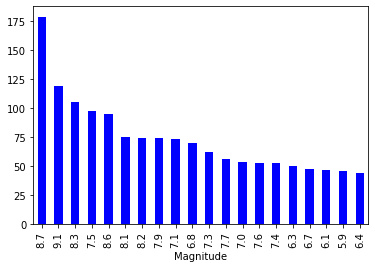

In [19]:
df.groupby('Magnitude')['Longitude'].mean().nlargest(20).plot.bar(color='blue')

In [20]:
df.groupby('Depth')['Latitude'].mean() 

Depth
-1.100      34.131000
-0.097      34.200000
-0.076      37.621333
 0.000      40.194747
 0.020      37.909667
              ...    
 687.600   -20.073000
 688.000   -19.406000
 690.000   -19.876000
 691.600   -24.871000
 700.000   -20.158000
Name: Latitude, Length: 3485, dtype: float64

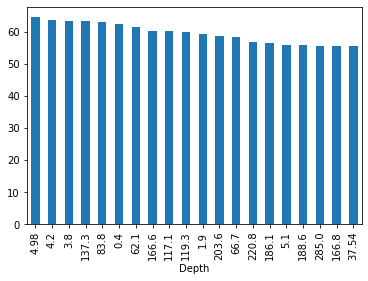

In [21]:
df.groupby('Depth')['Latitude'].mean().nlargest(20).plot.bar()

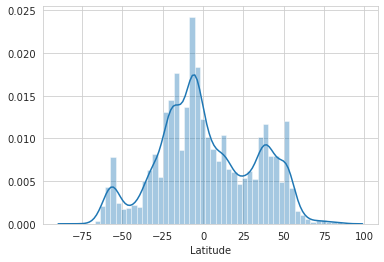

In [22]:
sns.set_style(style='whitegrid')
sns.distplot(df['Latitude'])

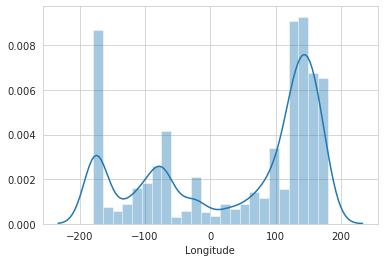

In [23]:
sns.set_style(style='whitegrid')
sns.distplot(df['Longitude'])

Text(0.5, 0, 'Number of outlets')

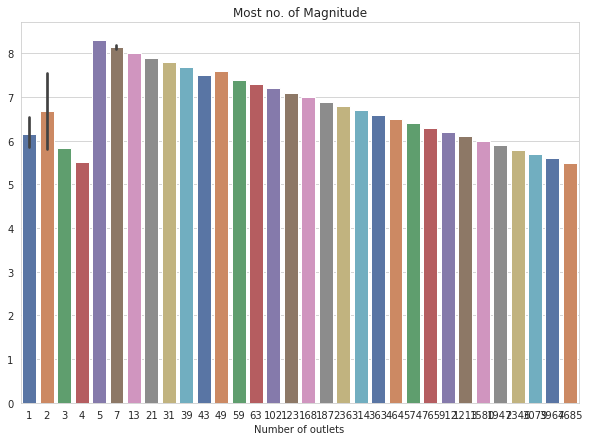

In [24]:
plt.figure(figsize=(10,7))
chains=df['Magnitude'].value_counts()
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most no. of Magnitude")
plt.xlabel("Number of outlets")

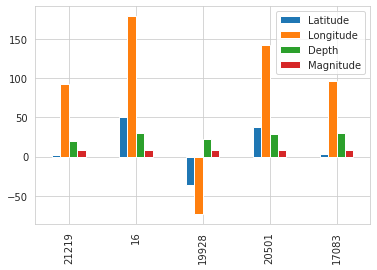

In [25]:
df.sort_values(by='Magnitude').tail(5).plot.bar()

In [26]:
from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',resolution='c')

longitudes = df["Longitude"].tolist()
latitudes = df["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

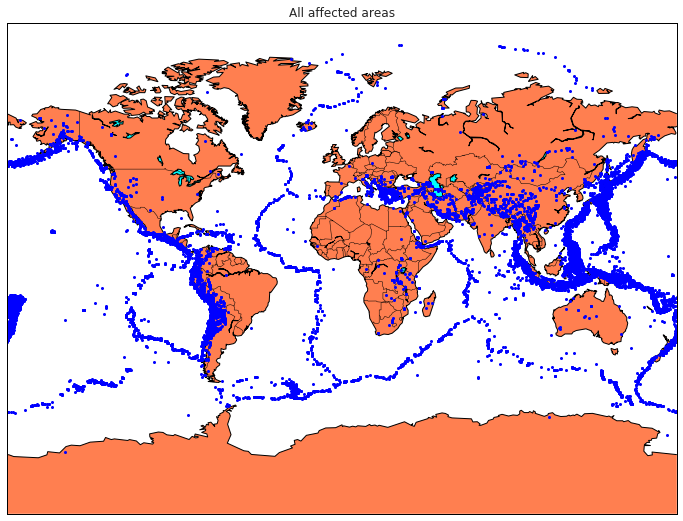

In [27]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 2, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()
plt.show()

**Converting Date & Time to Datestamp for ease of use**

In [28]:
timestamp = []
for d, t in zip(df['Date'], df['Time']):
    try:
        ts = datetime.datetime.strptime(d+' '+t, '%m/%d/%Y %H:%M:%S')
        timestamp.append(time.mktime(ts.timetuple()))
    except ValueError:
        # print('ValueError')
        timestamp.append('ValueError')
        
timeStamp = pd.Series(timestamp)
df['Timestamp'] = timeStamp.values

In [29]:
final_data = df.drop(['Date', 'Time'], axis=1)
final_data = final_data[final_data.Timestamp != 'ValueError']
final_data.head()

,Latitude,Longitude,Depth,Magnitude,Timestamp
0,19.246,145.616,131.6,6.0,-1.57631e+08
1,1.863,127.352,80.0,5.8,-1.57466e+08
2,-20.579,-173.972,20.0,6.2,-1.57356e+08
3,-59.076,-23.557,15.0,5.8,-1.57094e+08
4,11.938,126.427,15.0,5.8,-1.57026e+08


**Declaring X & Y, and splitting the dataset into tranning & testing model**

In [30]:
X = final_data[['Timestamp', 'Latitude', 'Longitude']]
y = final_data[['Magnitude', 'Depth']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6) #Random State 6 gives best result for this case

In [31]:
reg = RandomForestRegressor(random_state=6)
reg.fit(X_train, y_train)
reg.predict(X_test)

array([[ 5.809 , 21.871 ],
       [ 5.899 , 36.615 ],
       [ 5.741 , 40.311 ],
       ...,
       [ 6.176 , 52.2967],
       [ 5.898 , 40.888 ],
       [ 5.769 , 28.978 ]])

**Accuracy Score**

In [107]:
reg.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8733937415770104

**Analytics**

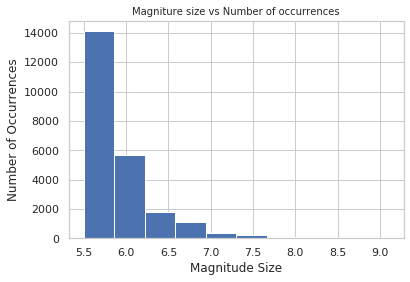

In [108]:
plt.hist(df['Magnitude'])
plt.xlabel('Magnitude Size')
plt.ylabel('Number of Occurrences')
plt.title('Magniture size vs Number of occurrences', fontweight = 20, fontsize = 10)
plt.show()

**Cross Validation**

In [32]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [34]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [36]:
parameters = {'n_estimators':[10, 20, 50, 100, 200]}
grid_obj = GridSearchCV(reg, parameters)
grid_fit = grid_obj.fit(X_train, y_train)
best_fit = grid_fit.best_estimator_
best_fit.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multi

array([[ 5.8245, 21.092 ],
       [ 5.8805, 35.0325],
       [ 5.7275, 42.0915],
       ...,
       [ 6.157 , 54.3663],
       [ 5.8885, 42.403 ],
       [ 5.7975, 28.2755]])

In [37]:
best_fit.score(X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


0.8755311885045632